# Complex Networks - Homework 3
## Group 1: Luna Giesselbach, Iwan Pasveer, Flavia Leotta, Noah Frinking, Dylan Gavron


Python version (3.12.6)

### Libraries used

In [24]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import math
from networkx.algorithms.community import greedy_modularity_communities, label_propagation_communities
from community import community_louvain
from networkx.algorithms.community.quality import modularity

## Exercise 1
The function SBM(c, nc, p_intra, p_inter) is a **Stochastic Block Model** function that creates a random graph with *c* communities, each of which has *nc* nodes that are connected within each other with a probability *p_intra*, and between nodes of different communities with a probability *p_inter*.

Since, as we know from the theory, in SBM the nodes belonging to the same community are connected with higher probability than the nodes belonging to different communities, we implemented an Exception that warns the user when an inter-probability bigger than the intra-probability is given.

We illustrate an example network (G_example_1) with c = 3, nc = 10, p_intra = 0.2 and p_inter = 0.05 (*Figure 1* in the report), by plotting it with the function plot_SBM(G_example_1).
Then we created a network called G1 with the following parameters: c = 10, nc = 100, p_intra = 0.1, p_inter = 0.01. We're not going to plot this but we're going to use this graph later.

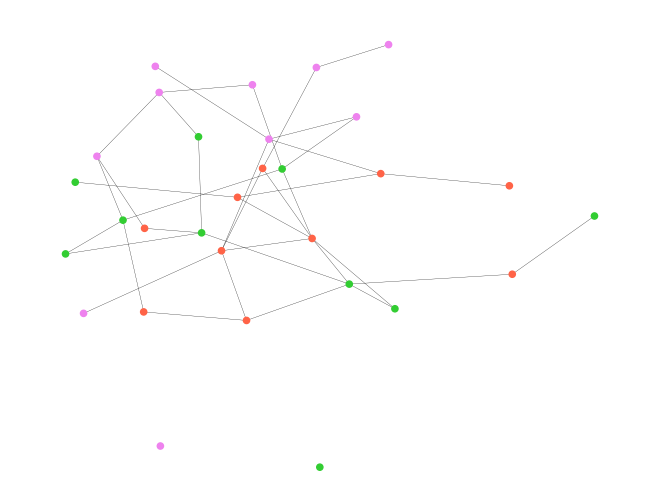

In [25]:
class InvalidProbability(Exception): # Personalised Exception class
    def __init__(self, message="The intracommunity probability should be bigger than the intercommunity probability"):
      self.message = message 

def SBM(c, nc, p_intra, p_inter):
  # c = number of communities
  # nc = number of nodes in each community
  # p_intra = probability of forming an intra community connection
  # p_inter = probability of forming an inter community connection

  try:

    # Condition mentioned in the intro
    if p_intra > p_inter:
      
      # We initialize the graph and the iteration
      G = nx.Graph() 
      last_node = 1

      # We create a list of colours for our different communities
      color_list= ['tomato', 'limegreen','violet','gold','deepskyblue','lime','darkorchid','aqua','firebrick','pink','royalblue','sandybrown']
    
      # Creating communities, adding nodes and creating intra-communities edges
      for community in range(1,c+1):

        # Community creation
        for node in range(last_node, last_node + nc):
          G.add_node(node)
          G.nodes[node]['color'] = color_list[community-1]
        
        # Intra-community edges creation
        for node_1 in range(last_node, last_node + nc-1):
          for node_2 in range(node_1+1, last_node + nc):
            success = random.random()
            if p_intra > 0 and success <= p_intra:
              G.add_edge(node_1,node_2)
        
        last_node += nc
      
      # Creating inter-community edges
      if p_inter > 0:
        for community_1 in range(1, c):
          for node_1 in range((community_1 - 1) * nc + 1, community_1 * nc + 1):
            for node_2 in range(community_1 * nc + 1, c * nc + 1):
              success = random.random()
              if success <= p_inter:
                G.add_edge(node_1, node_2)
      return G

    else:
      raise InvalidProbability()
  except InvalidProbability as f:
    return print(f.message)

# Function for plotting the graph
def plot_SBM(G):
  color_list = [G.nodes[node]['color'] for node in G.nodes]
  pos = nx.spring_layout(G, k=0.5)
  nx.draw(G, pos, node_color=color_list, width=0.2, node_size=20, with_labels=False)
  
  return plt.show()

# Example with G_example_1
G_example_1 = SBM(3, 10, 0.2, 0.05)
plot_SBM(G_example_1)

# Creation of G1 for the next exercise
G1 = SBM(10, 100, 0.1, 0.01)

## Exercise 2
We implemented an updated version of SBM model, SBM_D() where all communities are of different sizes, provided in a list. 

We illustrated an example with *comm_size* = [25, 10, 5], *p_intra* = 0.2 and *p_inter* = 0.05.
Using the same function we create two networks: G2 (parameters: ([500, 200, 100, 100, 100], 0.1, 0.01)) and G3 (parameters: ([600, 200, 100, 50, 50], 0.1, 0.01)). Both G2 and G3 aren't plotted, but used in the next exercises.

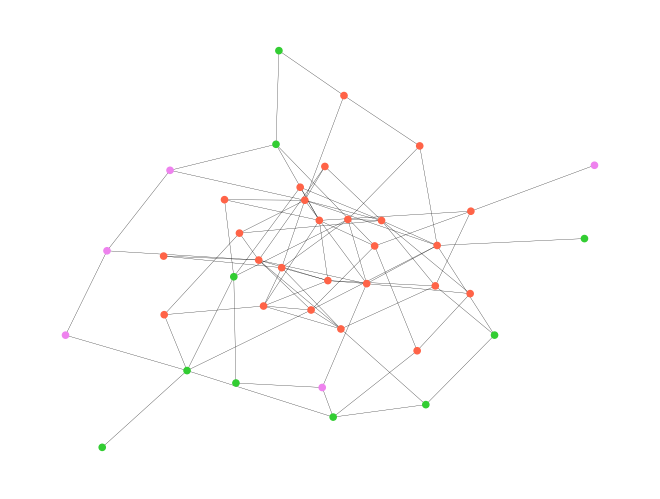

In [26]:
def SBM_D(comm_size, p_intra, p_inter):
  # comm_size = a list of communities sizes. This also provides the number of communities, defined as the length of the list
  # p_intra and p_inter are defined as before
  try:
    if p_intra > p_inter:
      G = nx.Graph()
      last_node = 1

      color_list= ['tomato', 'limegreen','violet','gold','deepskyblue','lime','darkorchid','aqua','firebrick','pink','royalblue','sandybrown']

      # This bit of code adjusts the lenght of the list of colours according to the number of communities
      color_list = (color_list * ((len(comm_size) // len(color_list)) + 1))[:len(comm_size)]
      
      # Communities creation
      for community in range(len(comm_size)):
        for node in range(last_node, last_node + comm_size[community]):
            G.add_node(node)
            G.nodes[node]['color'] = color_list[community]
            
        # Intra-community edges creation
        for node_1 in range(last_node, last_node + comm_size[community]-1):
          for node_2 in range(node_1+1, last_node + comm_size[community]):
            success = random.random()
            if p_intra > 0 and success <= p_intra:
              G.add_edge(node_1,node_2)
        
        last_node += comm_size[community]
      
      # Inter-community edges creation
      if p_inter > 0:
        for community_1 in range(len(comm_size)):
          start_node_1 = sum(comm_size[:community_1]) + 1
          end_node_1 = start_node_1 + comm_size[community_1]

          for community_2 in range(len(comm_size)):
            if community_1 < community_2:
              start_node_2 = sum(comm_size[:community_2]) + 1
              end_node_2 = start_node_2 + comm_size[community_2]

              for node_1 in range(start_node_1, end_node_1):
                for node_2 in range(start_node_2, end_node_2):
                    if random.random() <= p_inter:
                      G.add_edge(node_1, node_2)
      
      return G

    else:
      raise InvalidProbability()   
  except InvalidProbability as f:
    print(f.message)

# Function to plot the graph
def plot_SBM_D(G):
  color_list = [G.nodes[node]['color'] for node in G.nodes]
  pos = nx.spring_layout(G, k=0.05)
  nx.draw(G, pos, node_color=color_list, width=0.2, node_size=20, with_labels=False)
  return plt.show()

G_example_2 = SBM_D([25,10,5],0.2,0.05)
G2 = SBM_D([500, 200, 100, 100, 100], 0.1, 0.01)
G3 = SBM_D([600, 200, 100, 50, 50], 0.1, 0.01)
plot_SBM_D(G_example_2)

## Exercise 3
We implemented the degree_distribution(*graphs) function that plots degree (k) distribution of different graphs in a single figure on log-log scale. We decided to allow this function to take up to 12 arguments, potentially comparing more than 3 graphs in one figure. In our examples, though, we showed the comparison between G1, G2 anf G3 (created in exercise 1 and 2).

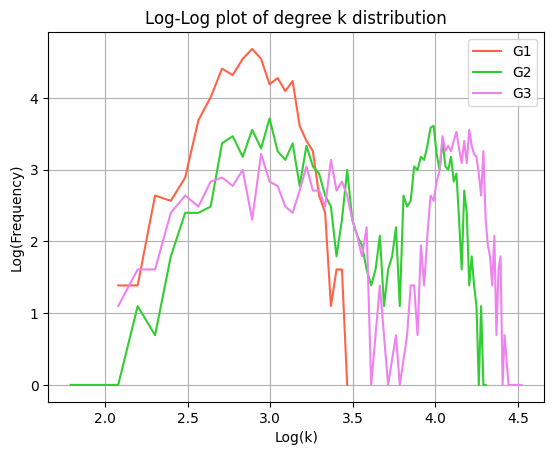

In [27]:
# This function takes and indeterminate number of arguments: this means that more than 3 (up to 12, just limited by the colours list) graphs can be compared 
def degree_distribution(*graphs):
  if len(graphs) > 12:
    raise ValueError("This function accepts only up to 12 arguments.")
  
  # Creating a function that, given a graph, returns a dictionary with the degree of each node
  def degree_one_graph(G):
    distribution = {}
    nodes = list(G.nodes())

    for node1 in nodes:
      degree = 0
      for node2 in nodes:
        if node1 != node2 and (G.has_edge(node1,node2) or G.has_edge(node2,node1)):
          degree += 1
      if degree in distribution:
        distribution[degree] += 1
      else:
        distribution[degree] = 1
    
    return distribution
  
  our_graphs = list(graphs)
  color_list= ['tomato', 'limegreen','violet','gold','deepskyblue','lime','darkorchid','aqua','firebrick','pink','royalblue','sandybrown']
  
  # Inizializing an index for clarity purposes in the plot legend
  index = 0

  # For each graph, creates a log-log plot of the nodes' degrees (x) and their absolute frequencies (y)
  for graph in our_graphs:
    distribution = degree_one_graph(graph)
    x_values = sorted(list(distribution.keys()))
    y_values = [distribution[x] for x in x_values]

    valid_pairs = [(x, y) for x, y in zip(x_values, y_values) if x > 0 and y > 0]

    # Only accepts pairs in which neither the degree or frequency is equal to 0, since the log(0) cannot be computed
    if valid_pairs:
      filtered_x_values, filtered_y_values = zip(*valid_pairs)
      
      log_x_values = [math.log(x) for x in filtered_x_values]
      log_y_values = [math.log(y) for y in filtered_y_values]

      plt.plot(log_x_values, log_y_values, color = color_list[index], label =f'G{index+1}')
    
    index += 1
  
  # Puts all plots together
  plt.xlabel("Log(k)")
  plt.ylabel("Log(Frequency)")
  plt.title("Log-Log plot of degree k distribution")
  plt.legend()
  plt.grid(True)
  
  return plt.show()

# Showing the distribution of the three graphs we created earlier
degree_distribution(G1,G2,G3)

## Exercise 4
We implemented core_number_distribution(*graphs) that plots core-number distribution of our graphs (to a maximum of 12 for the same reasons as before). A k-core is a maximal subgraph that contains nodes of degree k or more, and the core number of a node is the largest value k of a k-core containing that node.

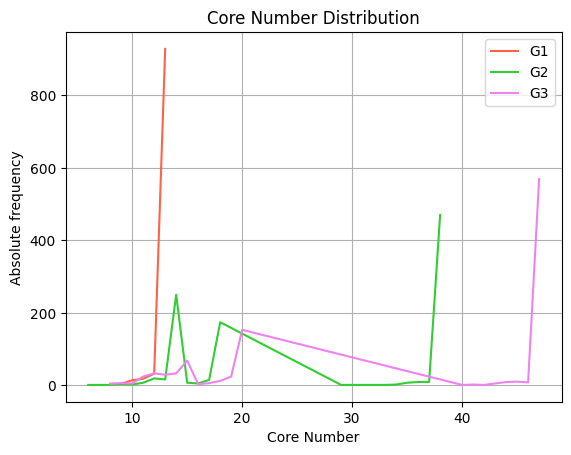

In [28]:
def core_number_distribution(*graphs):
    if len(graphs) > 12:
        raise ValueError("This function accepts only up to 12 arguments.")
    
    color_list= ['tomato', 'limegreen','violet','gold','deepskyblue','lime','darkorchid','aqua','firebrick','pink','royalblue','sandybrown']
    index = 0
    
    for G in graphs:
        core_numbers = nx.core_number(G)

        # Core_number function in NetworkX returns a dictionary in which, for every node (in the keys) provides their core number (in the values)
        # We create a second dictionary that counts how many times a specific core number appears is assigned to a node
        core_distribution = {}
        for core in core_numbers.values():
            if core in core_distribution:
                core_distribution[core] += 1
            else:
                core_distribution[core] = 1
        
        x_values = sorted(core_distribution.keys())
        y_values = [core_distribution[x] for x in x_values]

        plt.plot(x_values, y_values, color=color_list[index], label=f'G{index+1}')
        index += 1
    
    plt.xlabel("Core Number")
    plt.ylabel("Absolute frequency")
    plt.title("Core Number Distribution")
    plt.legend()
    plt.grid(True)
    
    return plt.show()

core_number_distribution(G1, G2, G3)

## Exercise 5
We implemented the function compare_communities(*graphs). It applies different community detection methods (Greedy, Label propagation and Louvain) and then compares their modularity.

In [29]:
def compare_communities(*graphs):
  if len(graphs) > 12:
    raise ValueError("This function accepts only up to 12 arguments.")
  
  index = 1

  for graph in graphs:
    greedy_communities = [set(community) for community in greedy_modularity_communities(graph)]
    greedy_modularity = modularity(graph, greedy_communities)
    
    label_prop_communities = [set(community) for community in label_propagation_communities(graph)]
    label_prop_modularity = modularity(graph, label_prop_communities)

    # Louvain method needs more work because it doesn't provide a list of sets of nodes, but a dictionary with nodes (key) and number of communty (item)
    louvain_communities_raw = community_louvain.best_partition(graph)
    louvain_communities_edited = {}

    for node,comm in louvain_communities_raw.items():
      if comm in louvain_communities_edited:
        louvain_communities_edited[comm].append(node)
      else:
        louvain_communities_edited[comm] = [node]
      
    louvain_communities = [set(community) for community in louvain_communities_edited.values()]
    louvain_modularity = modularity(graph, louvain_communities)

    
    print(f'''G{index} analysis:
          Greedy modularity: {round(greedy_modularity,3)}
          Label Propagation modularity: {round(label_prop_modularity,3)}
          Louvain modularity: {round(louvain_modularity,3)}
    ''')

    index += 1

compare_communities(G1, G2, G3)

G1 analysis:
          Greedy modularity: 0.335
          Label Propagation modularity: 0.0
          Louvain modularity: 0.42
    
G2 analysis:
          Greedy modularity: 0.279
          Label Propagation modularity: 0.155
          Louvain modularity: 0.287
    
G3 analysis:
          Greedy modularity: 0.209
          Label Propagation modularity: 0.139
          Louvain modularity: 0.222
    
